Import The libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score


Load the dataset

In [2]:
df=pd.read_csv('UCI_Adult_Income_Dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(48842, 15)

Data Preprocessing

In [6]:
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

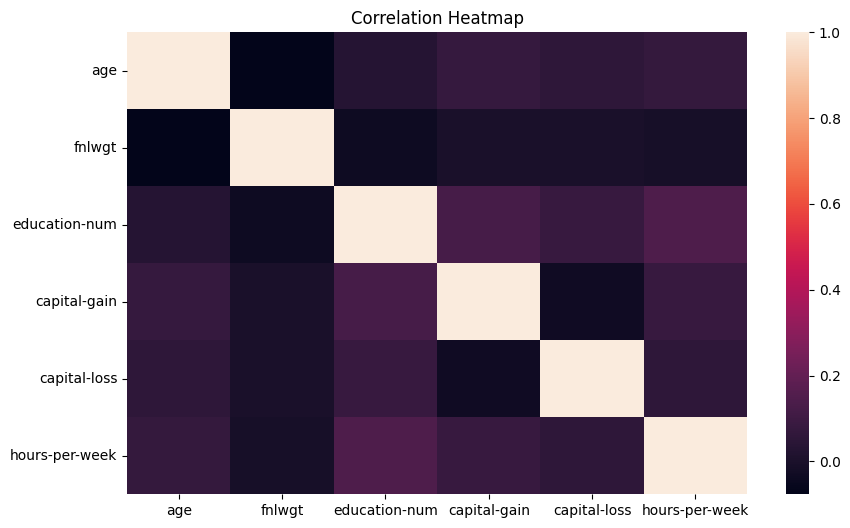

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [11]:
import numpy as np

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    print(f"{col}: {outliers} outliers")


age: 216 outliers
fnlwgt: 1453 outliers
education-num: 1794 outliers
capital-gain: 4035 outliers
capital-loss: 2282 outliers
hours-per-week: 13496 outliers


In [12]:
import numpy as np

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                      np.where(df[col] < lower_limit, lower_limit, df[col]))
    


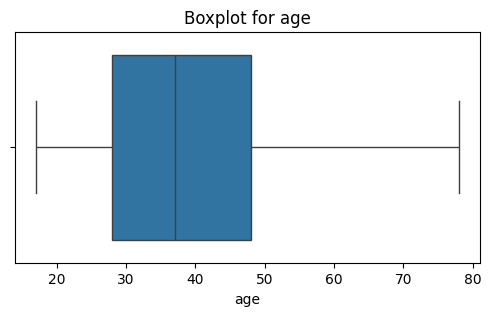

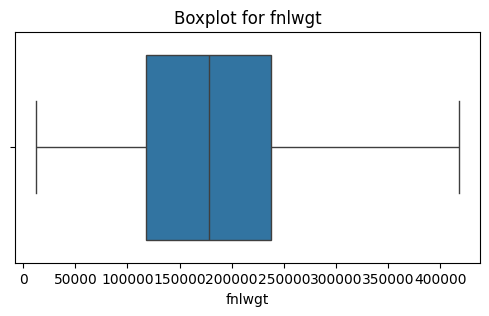

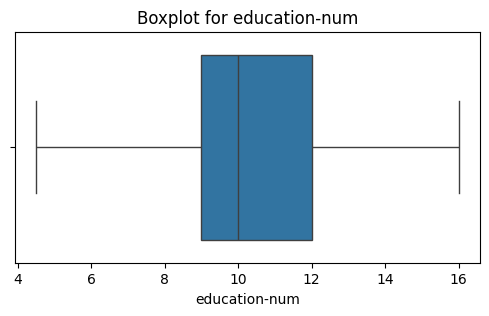

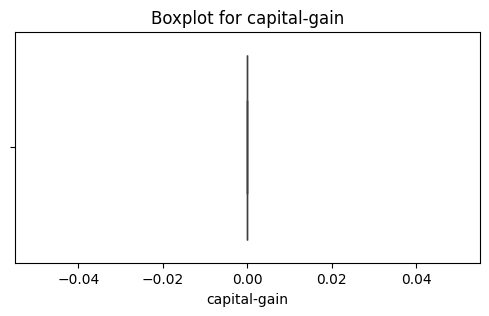

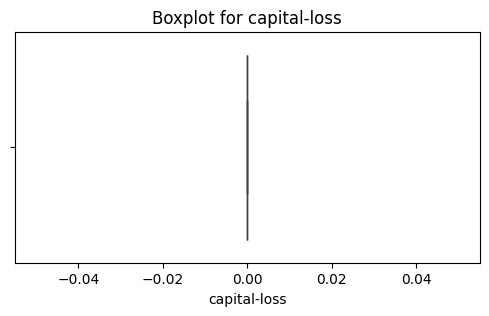

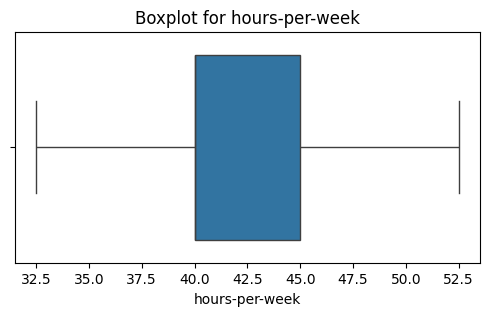

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


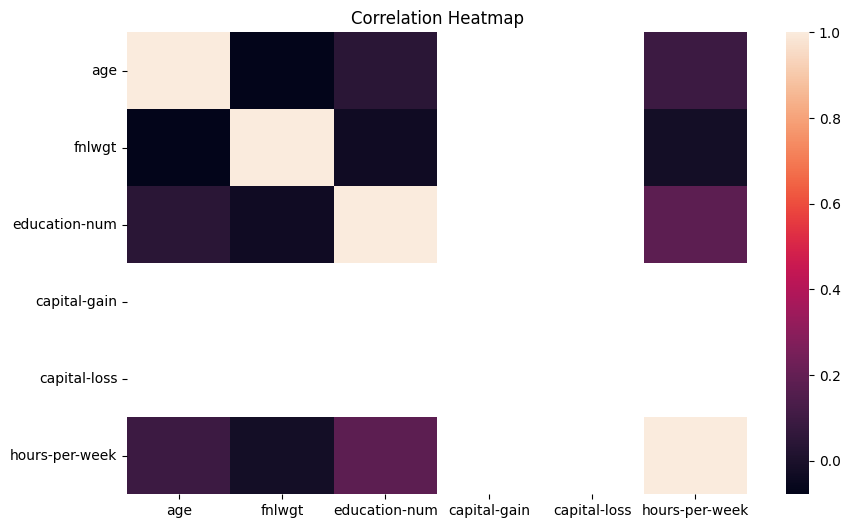

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
y_series = df['income']

y_clean = y_series.str.strip().str.replace(".", "", regex=False)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)

print(y_encoded[:10])


[0 0 0 0 0 0 0 1 1 1]


In [16]:
X = df.drop('income', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)

Train And Test The Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

Feature Scaling

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train The Models


In [19]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Classifier Report:",classification_report(y_test, knn_pred))
print("accuracy:",accuracy_score(y_test, knn_pred))

KNN Classifier Report:               precision    recall  f1-score   support

           0       0.86      0.89      0.87      7414
           1       0.61      0.55      0.58      2355

    accuracy                           0.81      9769
   macro avg       0.73      0.72      0.72      9769
weighted avg       0.80      0.81      0.80      9769

accuracy: 0.8050977582147609


In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Logistic Regression Report:",classification_report(y_test, log_pred))
print("accuracy:",accuracy_score(y_test, log_pred))

Logistic Regression Report:               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7414
           1       0.70      0.54      0.61      2355

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769

accuracy: 0.8331456648582249


In [25]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("accuracy:",accuracy_score(y_test, svm_pred))

accuracy: 0.8318149247620023


Confusion Matrix Comparison

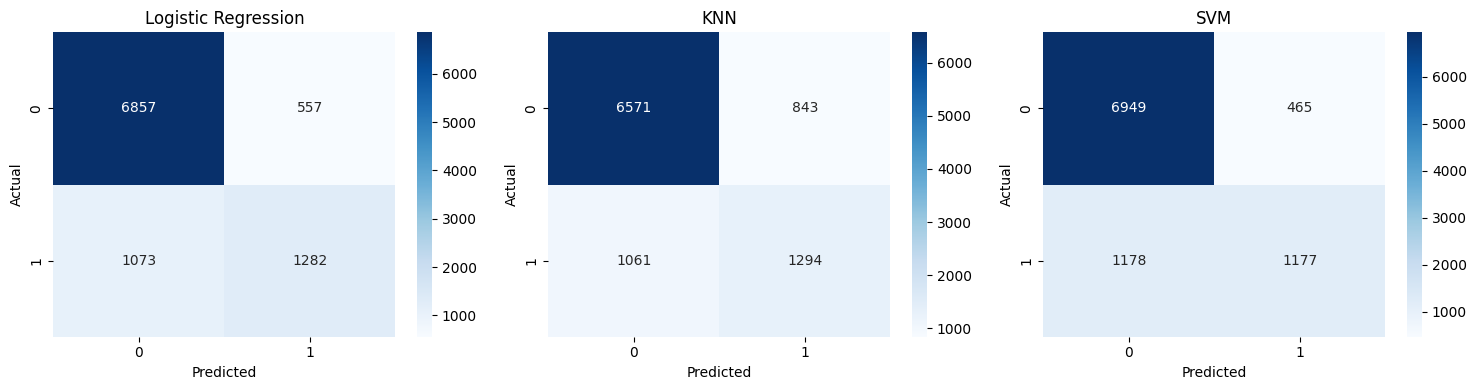

In [30]:

from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, log_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("KNN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [26]:
def get_scores(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred)
    }

In [27]:
results = pd.DataFrame({
    "Model": ["KNN", "Logistic Regression", "SVM"],
    "Accuracy": [
        get_scores(y_test, knn_pred)["Accuracy"],
        get_scores(y_test, log_pred)["Accuracy"],
        get_scores(y_test, svm_pred)["Accuracy"],
    ],
    "Precision": [
        get_scores(y_test, knn_pred)["Precision"],
        get_scores(y_test, log_pred)["Precision"],
        get_scores(y_test, svm_pred)["Precision"],
    ],
    "Recall": [
        get_scores(y_test, knn_pred)["Recall"],
        get_scores(y_test, log_pred)["Recall"],
        get_scores(y_test, svm_pred)["Recall"],
    ],
})

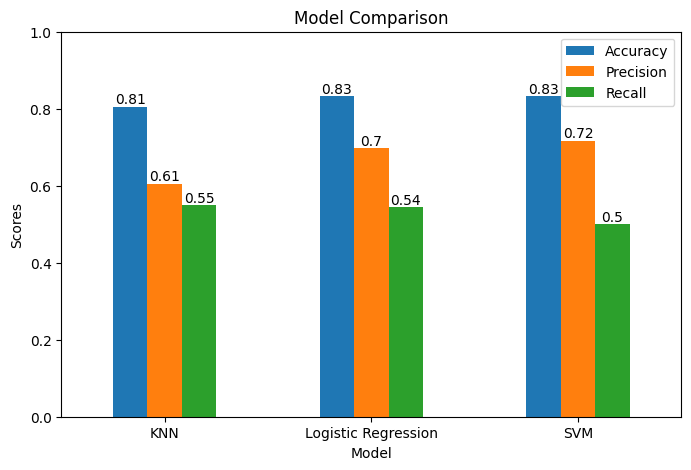

In [28]:
ax = results.plot(x="Model", kind="bar", figsize=(8,5))
plt.title("Model Comparison")
plt.ylabel("Scores")
plt.ylim(0, 1)
plt.xticks(rotation=0)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            round(bar.get_height(), 2),
            ha='center', va='bottom')

plt.show()